## Correlation of top 25 performing stocks in S&P 500 in 2017
In this notebook I decided to see past correlation of the best 25 performing stocks in S&P 500 to S&P 500 in 2017. The data is broken by years and years-months. 

Conclusion: most of the stocks, grouping by year, are highly correlated to S&P 500 >0.8 and many have correlation of >0.9, which makes sense since S&P had strong performance in 2017 returns in 2017. The only exception was FSLR, data for which was not available after 2017-04. However, looking at year-monthly data, we can see that the correlation varies a lot month to month. From this we can draw the conclusion that while stocks are correlated to the market in the long run, individual stock's performance varies in the short term. 

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import quandl
import pandas_datareader as pdr
import datetime as dt
import seaborn as sns
%matplotlib inline

In [2]:
key = # removed key for security reasons

In [3]:
quandl.ApiConfig.api_key = key

Chosen from best performing stocks in S&P 500 in 2017. Best one up 132%, worst one up 62%. https://www.fool.com/investing/2017/12/28/the-25-top-performing-sp-500-stocks-of-2017.aspx

In [4]:
stocks = ['ALGN', 'NRG', 'FSLR', 'VRTX', 'MU', 
          'WYNN', 'BA', 'PYPL', 'DHI', 'NVDA', 
          'PHM', 'CNC', 'ATVI', 'AA', 'LRCX', 
          'RHT', 'ISRG', 'ADBE', 'FMC', 'ILMN', 
          'CBOE', 'CAT', 'CDNS', 'EL', 'AVY']

In [5]:
start = '2000-01-01'
end = '2017-12-31'

In [6]:
data = pd.DataFrame()
df = pd.DataFrame()

In [7]:
# Getting data from Quandl
for stock in stocks:
    # .11 to get Adj Close column
    data = quandl.get('WIKI/'+stock+'.11', start_date=start, end_date=end).rename(columns={'Adj. Close':stock})
    
    if df.empty:
        df = data    
    else:
        df = df.join(data, how='outer')

In [8]:
df.head()

,ALGN,NRG,FSLR,VRTX,MU,WYNN,BA,PYPL,DHI,NVDA,...,RHT,ISRG,ADBE,FMC,ILMN,CBOE,CAT,CDNS,EL,AVY
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,18.75,37.970,NaN,27.180308,NaN,3.481515,3.619582,...,115.750,NaN,16.277607,12.269772,NaN,NaN,14.984244,22.06,20.401353,43.588906
2000-01-04,NaN,NaN,NaN,17.28,36.500,NaN,27.139731,NaN,3.350137,3.522926,...,107.500,NaN,14.912036,12.115842,NaN,NaN,14.790123,22.00,20.043218,43.014885
2000-01-05,NaN,NaN,NaN,16.75,35.875,NaN,29.040120,NaN,3.400060,3.416991,...,128.000,NaN,15.177701,12.437087,NaN,NaN,15.347834,21.56,19.528656,44.578175
2000-01-06,NaN,NaN,NaN,16.75,37.000,NaN,29.121276,NaN,3.218759,3.185016,...,114.125,NaN,15.331638,12.325544,NaN,NaN,15.908626,20.94,19.940305,45.988799
2000-01-07,NaN,NaN,NaN,18.22,35.250,NaN,29.966645,NaN,3.334371,3.238370,...,132.250,NaN,16.076495,12.312159,NaN,NaN,16.426281,22.31,20.635993,46.141464


In [9]:
sp500 = pdr.get_data_yahoo('^GSPC', start=start, end=end)

In [10]:
sp500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
2000-01-10,1441.469971,1464.359985,1441.469971,1457.599976,1457.599976,1064800000
2000-01-11,1457.599976,1458.660034,1434.420044,1438.560059,1438.560059,1014000000
2000-01-12,1438.560059,1442.599976,1427.079956,1432.250000,1432.250000,974600000
2000-01-13,1432.250000,1454.199951,1432.250000,1449.680054,1449.680054,1030400000


In [11]:
df['month'] = df.index.month

In [12]:
df['year'] = df.index.year

In [13]:
df.head()

,ALGN,NRG,FSLR,VRTX,MU,WYNN,BA,PYPL,DHI,NVDA,...,ADBE,FMC,ILMN,CBOE,CAT,CDNS,EL,AVY,month,year
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,18.75,37.970,NaN,27.180308,NaN,3.481515,3.619582,...,16.277607,12.269772,NaN,NaN,14.984244,22.06,20.401353,43.588906,1,2000
2000-01-04,NaN,NaN,NaN,17.28,36.500,NaN,27.139731,NaN,3.350137,3.522926,...,14.912036,12.115842,NaN,NaN,14.790123,22.00,20.043218,43.014885,1,2000
2000-01-05,NaN,NaN,NaN,16.75,35.875,NaN,29.040120,NaN,3.400060,3.416991,...,15.177701,12.437087,NaN,NaN,15.347834,21.56,19.528656,44.578175,1,2000
2000-01-06,NaN,NaN,NaN,16.75,37.000,NaN,29.121276,NaN,3.218759,3.185016,...,15.331638,12.325544,NaN,NaN,15.908626,20.94,19.940305,45.988799,1,2000
2000-01-07,NaN,NaN,NaN,18.22,35.250,NaN,29.966645,NaN,3.334371,3.238370,...,16.076495,12.312159,NaN,NaN,16.426281,22.31,20.635993,46.141464,1,2000


In [14]:
corr_by_year = df.groupby('year').corrwith(sp500['Adj Close'])

In [29]:
corr_by_year.drop('month', axis=1, inplace=True)
corr_by_year

,AA,ADBE,ALGN,ATVI,AVY,BA,CAT,CBOE,CDNS,CNC,...,ISRG,LRCX,MU,NRG,NVDA,PHM,PYPL,RHT,VRTX,WYNN
year,,,,,,,,,,,,,,,,,,,,,
2000,NaN,0.006858,NaN,-0.219513,0.228348,-0.391243,-0.091030,NaN,-0.280261,NaN,...,0.623641,0.387760,0.743348,NaN,0.384079,-0.352322,NaN,0.082018,-0.099293,NaN
2001,NaN,0.781519,0.875773,-0.454198,0.519538,0.787239,-0.016507,NaN,0.694638,0.832712,...,0.015113,0.473331,0.764453,NaN,-0.317534,0.385440,NaN,0.590758,0.890160,NaN
2002,NaN,0.906059,0.881732,0.575486,0.097155,0.755218,0.894869,NaN,0.967181,-0.603888,...,0.862606,0.960976,0.905622,NaN,0.918003,0.416562,NaN,0.567958,0.680271,-0.051296
2003,NaN,0.841990,0.940603,0.901832,-0.423982,0.911023,0.923216,NaN,0.918396,0.922815,...,0.819107,0.936575,0.877239,0.231125,0.717125,0.898165,NaN,0.823906,-0.093942,0.794045
2004,NaN,0.581337,-0.369845,0.614780,-0.040173,0.302105,0.879330,NaN,0.260192,0.622821,...,0.619885,0.600873,-0.079440,0.457475,0.471229,0.262606,NaN,-0.171530,0.693313,0.634636
2005,NaN,0.325285,-0.421647,0.546286,0.203716,0.665419,0.830022,NaN,0.756924,-0.168518,...,0.782147,0.740247,0.778676,0.733828,0.787284,0.711298,NaN,0.688197,0.743086,-0.108608
2006,NaN,0.676025,0.866770,0.909691,0.936374,0.593480,-0.495571,NaN,0.491490,-0.028737,...,-0.262226,0.731731,-0.292958,0.710502,0.940873,-0.035028,NaN,-0.685407,0.623448,0.770176
2007,NaN,0.631073,0.699068,0.397578,-0.110164,0.703727,0.824070,NaN,0.454713,-0.267239,...,0.325988,0.576727,-0.027754,0.778146,0.533958,-0.334058,NaN,-0.067609,0.037265,0.355837
2008,NaN,0.841993,0.874347,0.643688,0.968499,0.961407,0.950600,NaN,0.906572,0.208690,...,0.922063,0.976845,0.882549,0.933067,0.843014,0.496033,NaN,0.893103,-0.073314,0.962195


In [16]:
corr_by_month_year = df.groupby(['year','month']).corrwith(sp500['Adj Close'])

In [17]:
corr_by_month_year

AA      ADBE      ALGN      ATVI       AVY        BA  \
year month                                                               
2000 1           NaN  0.833505       NaN  0.407064  0.542321  0.019801   
     2           NaN -0.697734       NaN  0.745975  0.745878  0.742403   
     3           NaN  0.854188       NaN -0.597796  0.377009  0.686676   
     4           NaN  0.397190       NaN  0.628999 -0.303433 -0.022376   
     5           NaN  0.824861       NaN  0.502149  0.555635  0.138019   
     6           NaN  0.431311       NaN  0.339538 -0.098854 -0.255571   
     7           NaN  0.820987       NaN  0.161761  0.577779 -0.448433   
     8           NaN  0.892775       NaN  0.927710 -0.030529  0.480106   
     9           NaN -0.706403       NaN  0.029186  0.845331 -0.754917   
     10          NaN  0.755916       NaN  0.420266  0.399727  0.258474   
     11          NaN  0.726056       NaN  0.925110 -0.812845 -0.348411   
     12          NaN  0.705526       NaN -0.469536  0.327735  0.743200   
2001 1           NaN  0.529020  1.000000  0.683361 -0.390984 -0.525324   
     2           NaN  0.943968  0.727736 -0.746084  0.401861 -0.858922   
     3           NaN -0.614485 -0.128986 -0.049434  0.743558  0.911491   
     4           NaN  0.963590  0.494552  0.884482  0.900501  0.916550   
     5           NaN  0.860108  0.851016  0.178333  0.855797  0.576533   
     6           NaN -0.306459  0.782883  0.253761  0.693717  0.650264   
     7           NaN  0.388577  0.326512  0.520941  0.771046  0.379956   
     8           NaN  0.807359  0.773853 -0.588702 -0.291570  0.939387   
     9           NaN  0.815878  0.815949  0.898425  0.977211  0.966297   
     10          NaN  0.877728  0.531151  0.648342  0.553002  0.449797   
     11          NaN  0.929082 -0.603792 -0.639961  0.944909  0.539407   
     12          NaN  0.560026  0.437453  0.031660  0.579218  0.208615   
2002 1           NaN  0.255266  0.176657  0.182130  0.149181 -0.016230   
     2           NaN  0.901799 -0.060449  0.544027  0.439718  0.400642   
     3           NaN  0.196114 -0.148156  0.446970  0.091734  0.658005   
     4           NaN  0.439629  0.841404 -0.200716 -0.490893  0.622066   
     5           NaN  0.627345 -0.076425  0.499114  0.567644  0.759690   
     6           NaN  0.667868  0.561147  0.716603 -0.122086 -0.311891   
...              ...       ...       ...       ...       ...       ...   
2015 7           NaN  0.739924  0.666841  0.757268  0.493128  0.754428   
     8           NaN  0.923498  0.970833  0.446531  0.880426  0.981262   
     9           NaN  0.029559  0.397445 -0.058942  0.944071  0.893010   
     10          NaN  0.728720  0.865123  0.926343  0.886054  0.934268   
     11          NaN  0.422022  0.811091  0.353420  0.732132  0.773722   
     12          NaN  0.174010  0.732422  0.444940  0.895034  0.804386   
2016 1           NaN  0.744885  0.765764  0.843140  0.838727  0.837049   
     2           NaN  0.842650  0.725070  0.560240  0.526564  0.419792   
     3           NaN  0.863382  0.272010  0.773188  0.899984  0.852025   
     4           NaN  0.816685  0.577910  0.871962  0.746897  0.623124   
     5           NaN  0.673104  0.657844  0.286446  0.206739 -0.143476   
     6           NaN  0.820337  0.517783  0.693018  0.802515  0.740784   
     7           NaN  0.933977  0.647409  0.501224  0.522795  0.898683   
     8           NaN  0.510911  0.739519  0.143698  0.243959  0.652849   
     9           NaN  0.518947  0.843428 -0.062721  0.791146  0.859527   
     10          NaN  0.627458  0.386962  0.473338  0.575382 -0.401370   
     11     0.917948 -0.528839  0.943244 -0.928472  0.607954  0.925520   
     12     0.101778  0.952014  0.899609  0.587743 -0.003482  0.845062   
2017 1      0.575392  0.741043 -0.415590  0.633524  0.766692  0.924810   
     2     -0.584488  0.952074  0.934531  0.828830  0.639716  0.948700   
     3      0.817344 -0.554188 -0.536873 -0.368327  0.770307  0.759130   
     4      0.815103  

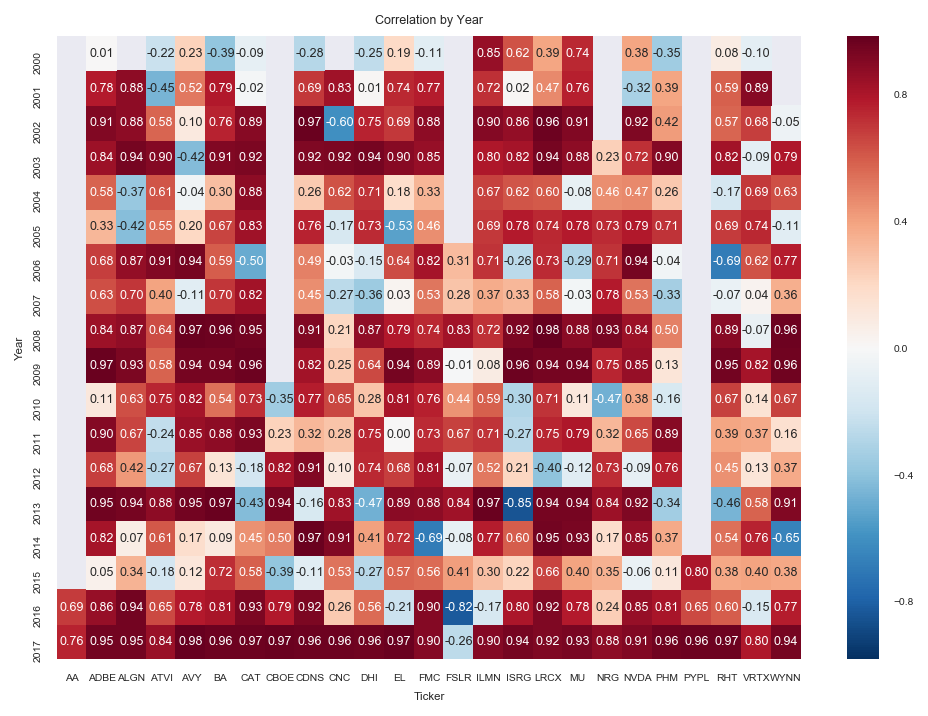

In [56]:
# Plotting correlation by year
fig = plt.figure(dpi = 150)
ax = plt.axes()
sns.set(font_scale=0.5)
sns.heatmap(corr_by_year, annot=True, annot_kws={"size": 6}, fmt="0.2f");

# Add labels and a title
ax.set_title('Correlation by Year');
ax.set_xlabel('Ticker');
ax.set_ylabel('Year');

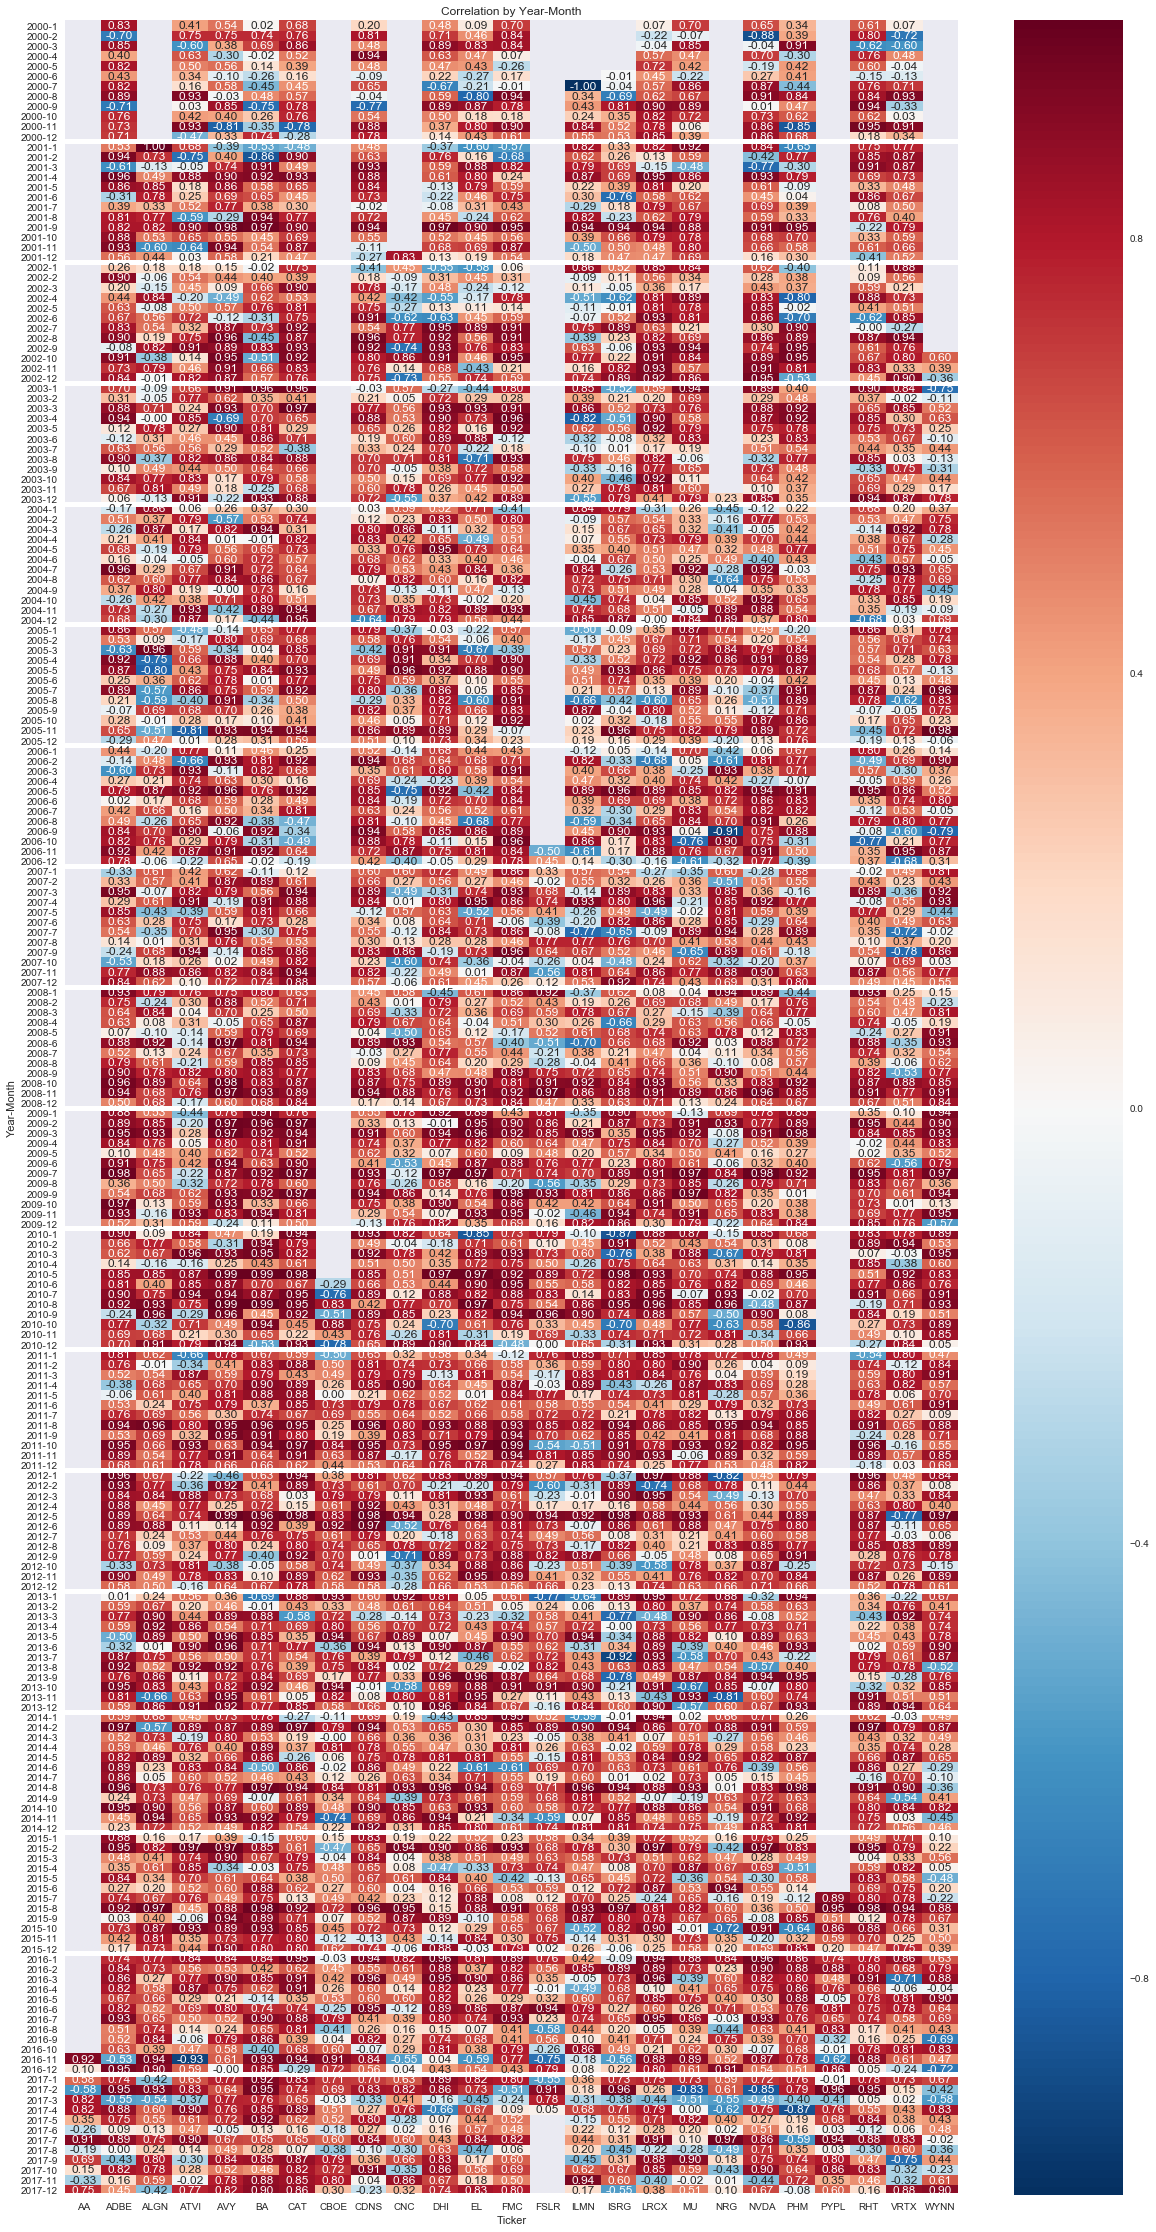

In [99]:
# Plotting correlation by year-month
fig = plt.figure(figsize=(20,40))
ax = plt.axes()
sns.set(font_scale=1)
sns.heatmap(corr_by_month_year, annot=True, fmt="0.2f");

# Setting lables and a title
ax.set_title('Correlation by Year-Month');
ax.set_ylabel('Year-Month');
ax.set_xlabel('Ticker');

# To divide heatmap by year
for i in range(len(corr_by_month_year.index)):
    if corr_by_month_year.index[i][1] == 1:
        ax.axhline(i, 0, 1, linewidth=5, c='w')

In [142]:
# Various statistics on the correlation data per year
corr_by_year.T.describe()

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,17.000000,19.000000,20.000000,21.000000,21.000000,21.000000,22.000000,22.000000,22.000000,22.000000,23.000000,23.000000,23.000000,23.000000,23.000000,24.000000,25.000000,25.000000
mean,0.100128,0.476937,0.648110,0.734772,0.392170,0.473523,0.399285,0.288717,0.778594,0.737355,0.403946,0.509959,0.347460,0.542243,0.444947,0.286990,0.565718,0.878957
std,0.386704,0.420891,0.406250,0.367075,0.332502,0.425387,0.510882,0.369698,0.261707,0.321571,0.406351,0.360694,0.403298,0.617316,0.467109,0.319266,0.455680,0.243408
min,-0.391243,-0.454198,-0.603888,-0.423982,-0.369845,-0.529711,-0.685407,-0.358376,-0.073314,-0.011090,-0.472845,-0.270533,-0.397217,-0.849524,-0.686965,-0.385495,-0.823801,-0.258377
25%,-0.219513,0.200277,0.573604,0.796662,0.260192,0.325285,-0.033456,-0.014438,0.749054,0.670476,0.124907,0.301395,0.011015,0.213022,0.171493,0.095186,0.559607,0.903938
50%,0.006858,0.694638,0.808912,0.877239,0.471229,0.693609,0.633538,0.361898,0.870927,0.907095,0.588152,0.665839,0.423169,0.878993,0.537608,0.364984,0.776078,0.946028
75%,0.384079,0.776159,0.904236,0.918396,0.622821,0.743086,0.760564,0.566035,0.930316,0.940881,0.717444,0.771609,0.703175,0.942519,0.795135,0.538998,0.852538,0.961784
max,0.853673,0.890160,0.967181,0.942610,0.879330,0.830022,0.940873,0.824070,0.976845,0.969499,0.816234,0.926006,0.912512,0.974511,0.969142,0.801442,0.944964,0.982194


In [143]:
# Various statistics on the correlation data per stock
corr_by_year.describe()

,AA,ADBE,ALGN,ATVI,AVY,BA,CAT,CBOE,CDNS,CNC,...,ISRG,LRCX,MU,NRG,NVDA,PHM,PYPL,RHT,VRTX,WYNN
count,2.000000,18.000000,17.000000,18.000000,18.000000,18.000000,18.000000,8.000000,18.000000,17.000000,...,18.000000,18.000000,18.000000,15.000000,18.000000,18.000000,3.000000,18.000000,18.000000,16.000000
mean,0.722342,0.659436,0.602976,0.418586,0.480862,0.629903,0.534990,0.439387,0.588370,0.369730,...,0.390366,0.709357,0.569424,0.509910,0.585664,0.332573,0.803293,0.400219,0.402202,0.491705
std,0.046725,0.320505,0.451368,0.464510,0.450578,0.371988,0.523442,0.554692,0.418967,0.466682,...,0.535371,0.330290,0.439236,0.376365,0.389782,0.450956,0.156351,0.477816,0.372807,0.464622
min,0.689302,0.006858,-0.421647,-0.454198,-0.423982,-0.391243,-0.495571,-0.385495,-0.280261,-0.603888,...,-0.849524,-0.397217,-0.292958,-0.472845,-0.317534,-0.352322,0.647876,-0.685407,-0.152206,-0.654029
25%,0.705822,0.593771,0.423169,-0.035018,0.133523,0.554928,0.099756,0.082240,0.355988,0.096503,...,0.064193,0.616072,0.180045,0.282764,0.405866,0.001266,0.724659,0.157398,0.059534,0.306646
50%,0.722342,0.799498,0.866770,0.594365,0.595338,0.740030,0.827046,0.645956,0.765859,0.279711,...,0.608759,0.744170,0.777377,0.710502,0.752204,0.378858,0.801442,0.552783,0.489322,0.651458
75%,0.738861,0.887504,0.925676,0.726232,0.914549,0.902066,0.925309,0.849521,0.916925,0.831672,...,0.814882,0.940065,0.899853,0.762635,0.854287,0.750311,0.881002,0.683955,0.730643,0.822896
max,0.755381,0.969499,0.951143,0.909691,0.982194,0.974511,0.965111,0.971532,0.969142,0.961784,...,0.962932,0.976845,0.939067,0.933067,0.940873,0.956330,0.960562,0.965456,0.890160,0.962195


In [145]:
# Various statistics on the correlation data per month
corr_by_month_year.T.describe()

year        2000                                                         \
month         1          2          3          4          5          6    
count  15.000000  15.000000  15.000000  15.000000  15.000000  16.000000   
mean    0.426704   0.294656   0.379407   0.400661   0.364183   0.077053   
std     0.277159   0.635759   0.598127   0.373033   0.315851   0.258156   
min     0.019801  -0.881943  -0.622114  -0.303433  -0.263443  -0.269565   
25%     0.147703  -0.145846  -0.040087   0.235490   0.264322  -0.138421   
50%     0.480960   0.705613   0.686676   0.482302   0.433671   0.077464   
75%     0.665165   0.755413   0.850253   0.629573   0.528892   0.287559   
max     0.833505   0.836425   0.914837   0.940920   0.824861   0.452071   

year                                                 ...           2017  \
month         7          8          9          10    ...             3    
count  17.000000  17.000000  17.000000  17.000000    ...      25.000000   
mean    0.212365   0.470421   0.358482   0.478786    ...      -0.099352   
std     0.595528   0.551636   0.644676   0.243437    ...       0.492286   
min    -1.000000  -0.796485  -0.771205   0.029755    ...      -0.577860   
25%    -0.211820   0.337218   0.007269   0.258474    ...      -0.454764   
50%     0.454387   0.622979   0.780764   0.502755    ...      -0.332558   
75%     0.708235   0.892775   0.873156   0.722413    ...       0.047471   
max     0.870666   0.940783   0.937830   0.820386    ...       0.817344   

year                                                                     \
month         4          5          6          7          8          9    
count  25.000000  24.000000  24.000000  24.000000  24.000000  24.000000   
mean    0.456016   0.488397   0.164861   0.632494   0.009628   0.457618   
std     0.515329   0.302631   0.219680   0.370833   0.368569   0.486435   
min    -0.873334  -0.275785  -0.256271  -0.587504  -0.494541  -0.751884   
25%     0.272907   0.374744   0.027746   0.556242  -0.299320   0.276160   
50%     0.675068   0.537696   0.143883   0.786920   0.016261   0.676552   
75%     0.791915   0.713568   0.268843   0.879512   0.249816   0.808815   
max     0.902188   0.915764   0.572043   0.965313   0.711820   0.902787   

year                                    
month         10         11         12  
count  24.000000  24.000000  24.000000  
mean    0.508593   0.353514   0.442897  
std     0.428089   0.448751   0.435337  
min    -0.426166  -0.436535  -0.554839  
25%     0.412071   0.005700   0.167375  
50%     0.658005   0.484016   0.554638  
75%     0.824284   0.735180   0.805567  
max     0.908503   0.939201   0.902570  

[8 rows x 216 columns]

In [147]:
# Various statistics on the correlation data per stock, monthly basis
corr_by_month_year.describe()

,AA,ADBE,ALGN,ATVI,AVY,BA,CAT,CBOE,CDNS,CNC,...,ISRG,LRCX,MU,NRG,NVDA,PHM,PYPL,RHT,VRTX,WYNN
count,14.000000,216.000000,204.000000,216.000000,216.000000,216.000000,216.000000,91.000000,216.000000,193.000000,...,211.000000,216.000000,216.000000,169.000000,216.000000,216.000000,30.000000,216.000000,216.000000,183.000000
mean,0.337369,0.546322,0.440374,0.431129,0.572075,0.550448,0.633807,0.383858,0.572992,0.340178,...,0.384838,0.561336,0.510788,0.362691,0.494275,0.495052,0.486738,0.496343,0.417120,0.457584
std,0.518887,0.422946,0.428199,0.433077,0.396504,0.424111,0.339631,0.439906,0.349607,0.457443,...,0.478657,0.391198,0.405461,0.491810,0.421198,0.426416,0.452812,0.412680,0.436431,0.445363
min,-0.584488,-0.706403,-0.801796,-0.928472,-0.812845,-0.858922,-0.784180,-0.784877,-0.771205,-0.753526,...,-0.919706,-0.738251,-0.833439,-0.909766,-0.881943,-0.873334,-0.616984,-0.768486,-0.776994,-0.790257
25%,-0.118764,0.342141,0.173774,0.181180,0.407571,0.371189,0.500014,0.095177,0.419066,0.020508,...,0.123005,0.371895,0.319746,0.034613,0.279139,0.355231,0.073086,0.315645,0.200195,0.189537
50%,0.463021,0.704784,0.588898,0.537037,0.713897,0.711056,0.743064,0.500756,0.670887,0.433186,...,0.521951,0.715043,0.649286,0.530970,0.642091,0.630232,0.663267,0.625246,0.542725,0.601120
75%,0.799566,0.875400,0.768161,0.770798,0.873940,0.854856,0.880107,0.730403,0.831152,0.761481,...,0.758669,0.855217,0.820450,0.782077,0.830521,0.814524,0.850175,0.831357,0.766670,0.828790
max,0.917948,0.980105,1.000000,0.972685,0.991301,0.987466,0.984584,0.940947,0.982051,0.956491,...,0.980475,0.974646,0.970697,0.965313,0.984929,0.981877,0.964747,0.977782,0.948897,0.984501


### The end